# IMPORTS & START


In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from scipy import stats
import scipy

### Attributes

### GA Sessions
#### Описание атрибутов:
#### ~ session_id — ID визита;
#### ~ client_id — ID посетителя;
#### ~ visit_date — дата визита;
#### ~ visit_time — время визита;
#### ~ visit_number — порядковый номер визита клиента; 
#### ~ utm_source — канал привлечения;
#### ~ utm_medium — тип привлечения;
#### ~ utm_campaign — рекламная кампания;
#### ~ utm_keyword — ключевое слово;
#### ~ device_category — тип устройства;
#### ~ device_os — ОС устройства;
#### ~ device_brand — марка устройства;
#### ~ device_model — модель устройства;
#### ~ device_screen_resolution — разрешение экрана;
#### ~ device_brand — марка устройства;
#### ~ device_model — модель устройства;
#### ~ device_screen_resolution — разрешение экрана;
#### ~ device_browser — браузер;
#### ~ geo_country — страна;
#### ~ geo_city — город.

### GA Hits
#### session_id — ID визита;
####  hit_date — дата события;
####  hit_time — время события;
####  hit_number — порядковый номер события в рамках сессии; 
####  hit_type — тип события;
####  hit_referer — источник события;
####  hit_page_path — страница события;
####  event_category — тип действия;
####  event_action — действие;
####  event_label — тег действия;
####  event_value — значение результата действия

In [113]:
df = pd.read_csv('ga_hits.csv')
df.head()

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,NaN
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN,NaN
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN,NaN
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN,NaN
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN,NaN


In [114]:
df1 = pd.read_csv('ga_sessions.csv')
df1.head()

/var/folders/nd/qbkv0n714jnb3_y8smphq5bh0000gn/T/ipykernel_189/3891542519.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('ga_sessions.csv')


,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.162225,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.162225,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow


# CLEANING

In [115]:
df.describe(include = "all")

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
count,15726470,15726470,6.566148e+06,1.572647e+07,15726470,9451666,15726470,15726470,15726470,11966286,0.0
unique,1734610,226,NaN,NaN,1,37873,342715,52,230,39825,NaN
top,5442565791571325612.1632449195.1632449195,2021-05-24,NaN,NaN,event,HbolMJUevblAbkHClEQa,podpiska.sberauto.com/,card_web,view_card,KclpemfoHstknWHFiLit,NaN
freq,768,513035,NaN,NaN,15726470,8879187,2793639,7456998,3558985,6505447,NaN
mean,NaN,NaN,2.091050e+05,2.356715e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,4.032110e+05,2.887713e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,0.000000e+00,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2.412000e+04,7.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,8.994100e+04,1.500000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,2.195352e+05,2.900000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [116]:
df1.describe(include = "all")

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
count,1860042,1.860042e+06,1860042,1860042,1.860042e+06,1859945,1860042,1640439,1524427,777981,1860042,789904,1492864,16338,1860042,1860042,1860042,1860042
unique,1860042,1.391717e+06,226,85318,NaN,293,56,412,286,1219,3,13,205,104,5039,57,166,2548
top,9055434745589932991.1637753792.1637753792,1.750498e+09,2021-05-24,12:00:00,NaN,ZpYIoDJMcFzVoPFsHGJL,banner,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Apple,AuMdmADEIoPXiWpTsBEj,414x896,Chrome,Russia,Moscow
freq,1,4.620000e+02,39453,61067,NaN,578290,552272,463481,1006599,506819,1474871,464054,551088,9778,169090,1013436,1800565,805329
mean,NaN,NaN,NaN,NaN,2.712804e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.182907e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,2.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Del NaN


In [117]:
df.isnull().sum()

session_id               0
hit_date                 0
hit_time           9160322
hit_number               0
hit_type                 0
hit_referer        6274804
hit_page_path            0
event_category           0
event_action             0
event_label        3760184
event_value       15726470
dtype: int64

<Axes: >

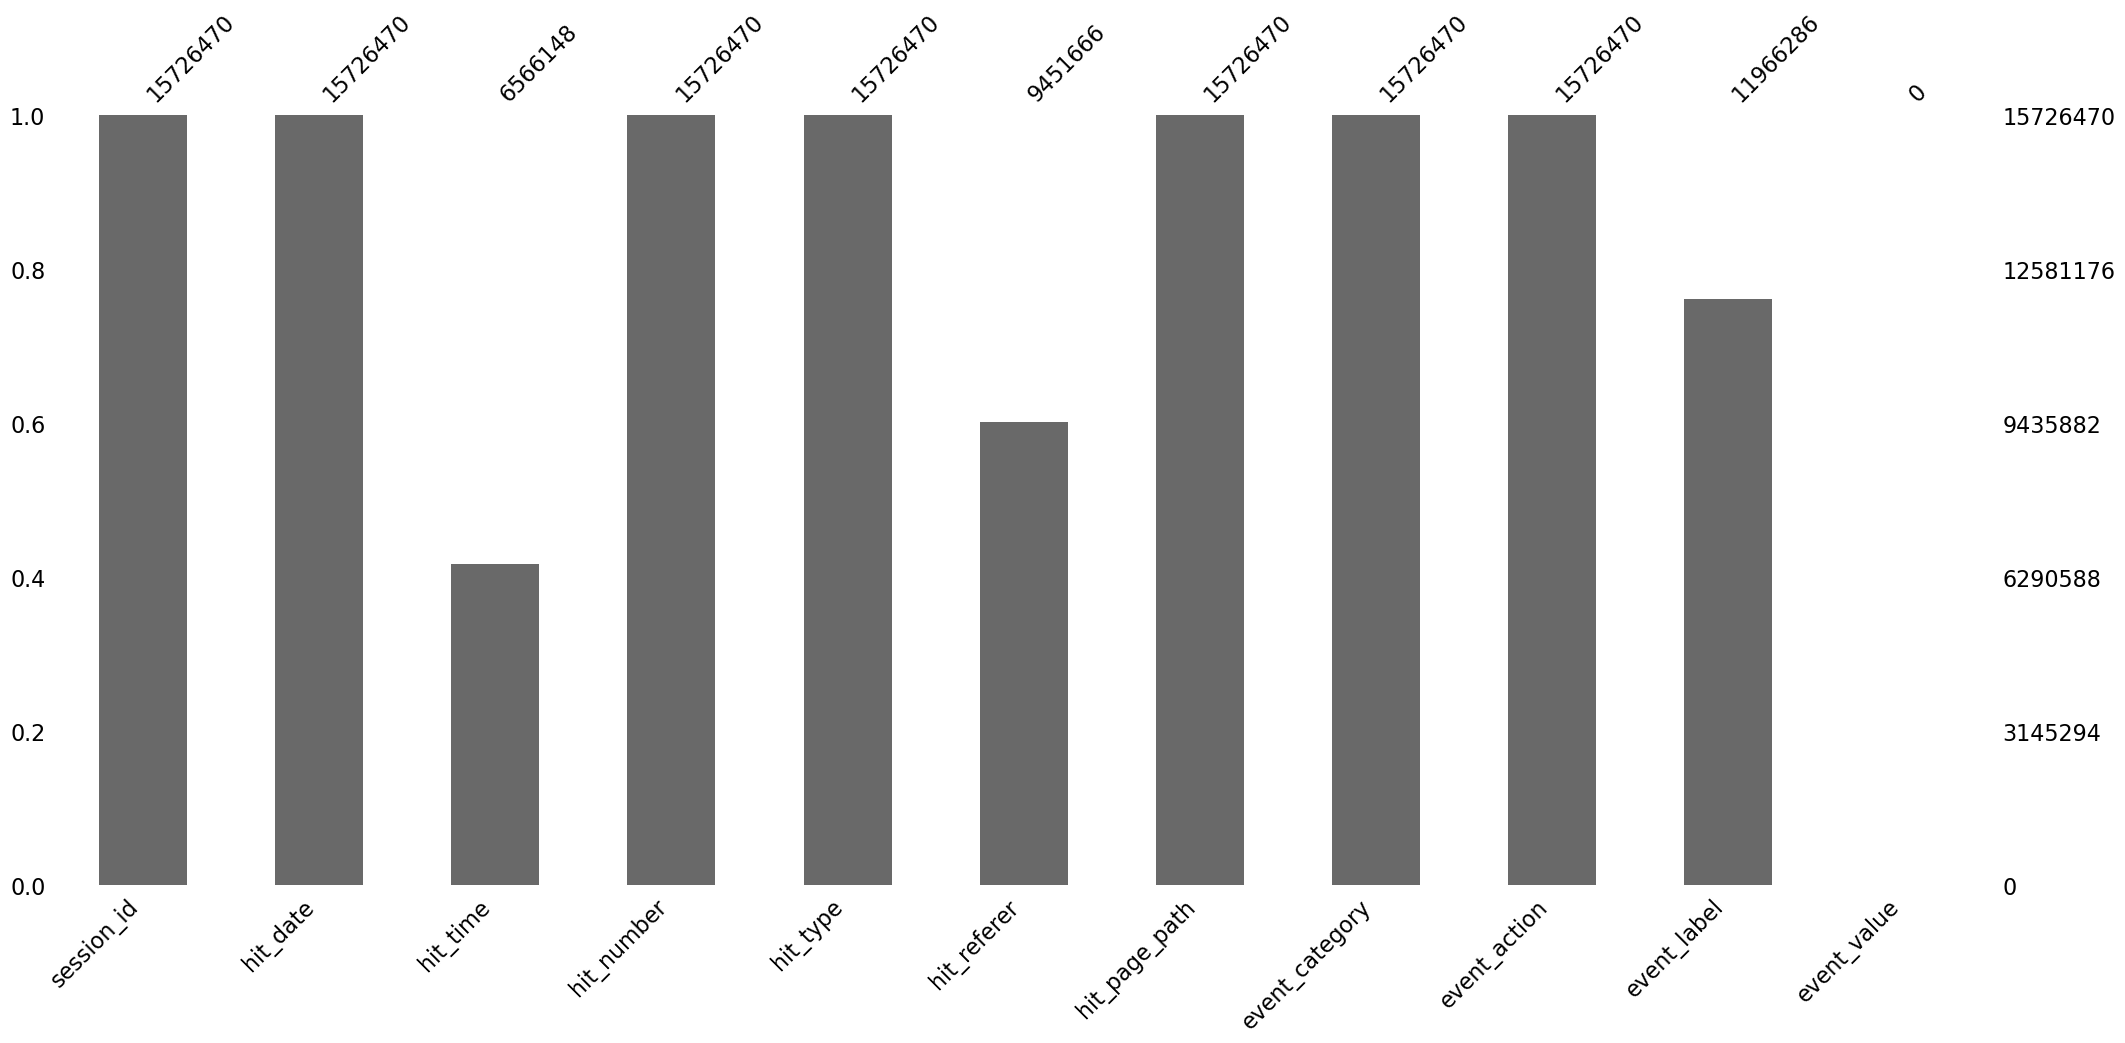

In [118]:
msno.bar(df)


In [119]:
df['event_label'].unique()

array([nan, 'GYKKaSmRGxilGoDZiuEJ', 'nsSPWOGBZhTHYKHvcPDM', ...,
       'zCMGPrpNkfsTcYWqMUzJ', 'NqyZafHYWtVdMoHFaUMP',
       'aNlmojNIfsJaXKZHCDiU'], dtype=object)

In [120]:
df['hit_referer'].unique()

array([nan, 'VloVXNWduHeTjUoDkjkO', 'trXmoxcphNjuYcShOXwL', ...,
       'SyKCPVqPvVwsypNSfuig', 'KpKtMqJlrvgANamYaRSI',
       'tvGabHlPFDvTmIFiCKTL'], dtype=object)

In [121]:
df_clean = df.dropna(subset=['event_label','hit_referer'])

In [122]:
df_clean.drop(['event_value'], axis = 1, inplace = True)

/var/folders/nd/qbkv0n714jnb3_y8smphq5bh0000gn/T/ipykernel_189/1349277419.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop(['event_value'], axis = 1, inplace = True)


In [123]:
dfp = df.dropna()
m = dfp.hit_time.mode()
m

Series([], Name: hit_time, dtype: float64)

In [124]:
df_clean.hit_time = df_clean.hit_time.fillna('0.0')

/var/folders/nd/qbkv0n714jnb3_y8smphq5bh0000gn/T/ipykernel_189/3037062012.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.hit_time = df_clean.hit_time.fillna('0.0')


In [125]:
df_clean.isnull().sum()

session_id        0
hit_date          0
hit_time          0
hit_number        0
hit_type          0
hit_referer       0
hit_page_path     0
event_category    0
event_action      0
event_label       0
dtype: int64

In [126]:
df1.isnull().sum()

session_id                        0
client_id                         0
visit_date                        0
visit_time                        0
visit_number                      0
utm_source                       97
utm_medium                        0
utm_campaign                 219603
utm_adcontent                335615
utm_keyword                 1082061
device_category                   0
device_os                   1070138
device_brand                 367178
device_model                1843704
device_screen_resolution          0
device_browser                    0
geo_country                       0
geo_city                          0
dtype: int64

<Axes: >

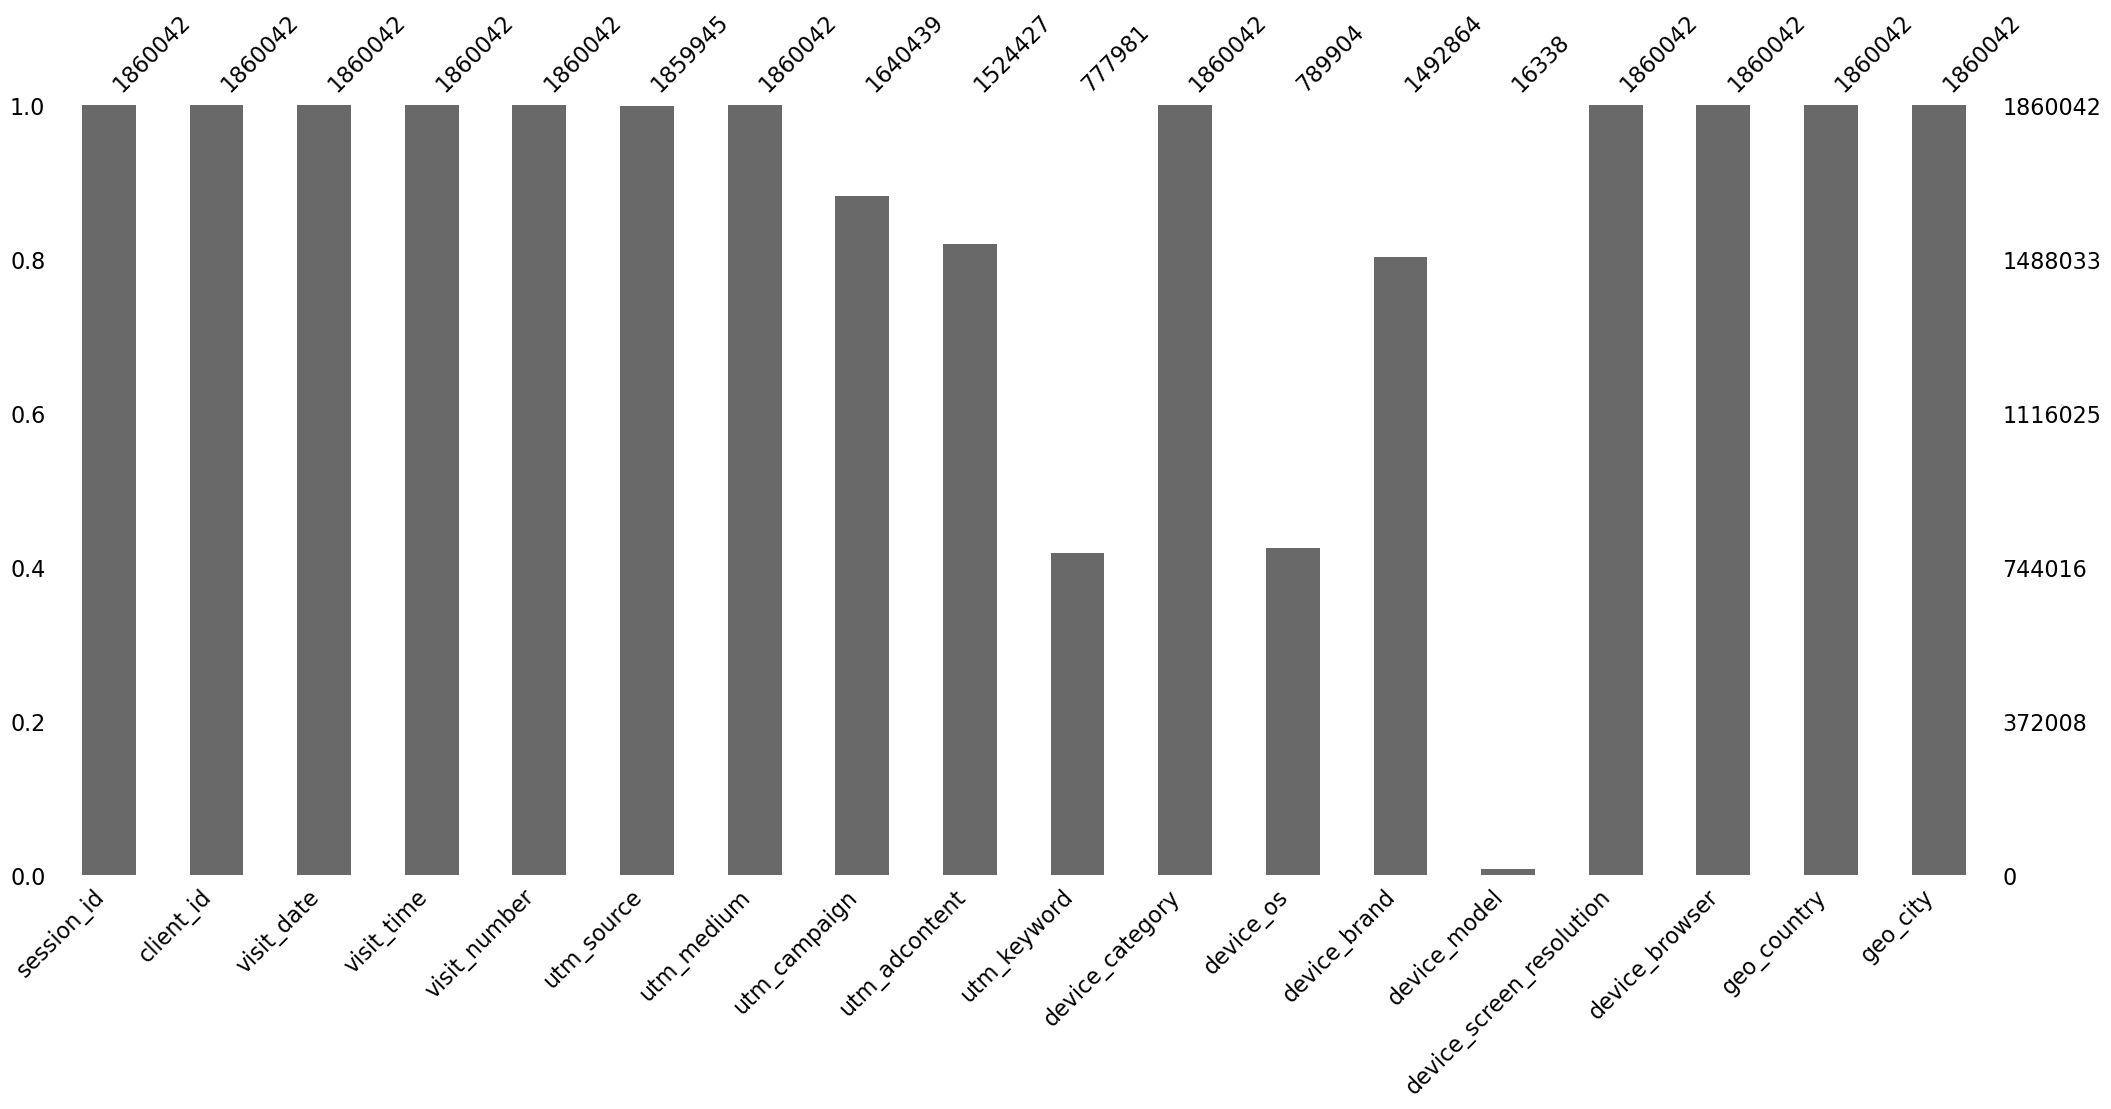

In [127]:
msno.bar(df1)

In [128]:
df_clean1 = df1.dropna(subset=['utm_campaign','utm_adcontent','utm_keyword','utm_source','device_model'])

In [129]:
df1['utm_adcontent'].unique()

array(['vCIpmpaGBnIQhyYNkXqp', 'xhoenQgDQsgfEPYNPwKO',
       'NOBKLgtuvqYWkXQHeYWM', nan, 'JNHcPlZPxEMWDnRiyoBf',
       'LcGIUNPUAmXtQJaDfFBR', 'NhvfEqcSTGEZKxxvUZlj',
       'LLfCasrxQzJIyuldcuWy', 'XKsYZiUFcdkUXQpoLKyS',
       'dUuXlWzvmhDSyclWRhNP', 'DZYjhfIUfdqhfuTNUmjn',
       'FkiRXDLOWtzVfvhEkhNo', 'TuyPWsGQruPMpKvRxeBF',
       'PkybGvWbaqORmxjNunqZ', 'UxrnyMlRBSOhOjytXnMG',
       'xnyHaukLtAvgViiZSyBC', 'ESUnXCsdWADovskBLvBO',
       'BdalQBXFeDGQTswaQtOL', 'SOkCdPxfUcZUzzOdgGES',
       'yYdBRbPmBMUZHXwqGxNx', 'AdeErYgVTbRcAWtHrMHq',
       'iyesFzGNBbKbSesPOuQt', 'lBvcHmZkKpwCXdgWSQYO',
       'XVKNbZXFFeCXocbAHwpS', 'SitoRrEOjouuWzzGooUa',
       'eOWmIGTKVDPewucDtZXG', 'aYAcKhelKzYpXrRYknSP',
       'nVzhCFmVaYpYhZVYHRhn', 'SAVVWaMghGnnvPOqMOIt',
       'lbhUYwMzoYJqJaUaTDba', 'LxluDbGsLnaemhTtGuvB',
       'OJiWyBKOyDITzXCZRSMH', 'qhEmhjPXvwgEHdBikgEQ',
       'WYLajZgbUhGimwBKDZUH', 'XSkXBCPfnJjvxbfeewtd',
       'EteMoEECGsaJeMnuvAZD', 'YTDFqIabKsQVGozQYoPf',
     

In [130]:
df1['utm_keyword'].unique()

array(['puhZPIYqKXeFPaUviSjo', 'IGUCNvHlhfHpROGclCit', nan, ...,
       'aCaBoYaQJPVffhjBQnut', 'RaeBwzCLChMDgYYukNOw',
       'fcXWTQaKfxbkBkBnzLhK'], dtype=object)

In [131]:
df1['device_os'].unique()

array(['Android', nan, 'iOS', 'Windows', 'Linux', 'Macintosh',
       '(not set)', 'Chrome OS', 'BlackBerry', 'Tizen', 'Firefox OS',
       'Samsung', 'Windows Phone', 'Nokia'], dtype=object)

In [132]:
df_clean1.device_os = df_clean1.device_os.fillna('(not set)')

/var/folders/nd/qbkv0n714jnb3_y8smphq5bh0000gn/T/ipykernel_189/1401462764.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean1.device_os = df_clean1.device_os.fillna('(not set)')


In [133]:
df1['device_brand'].unique()

array(['Huawei', 'Samsung', 'Xiaomi', 'Apple', 'Lenovo', nan, 'Vivo',
       'Meizu', 'OnePlus', '(not set)', 'BQ', 'Realme', 'OPPO', 'itel',
       'Philips', 'Nokia', 'Alcatel', 'LG', 'Tecno', 'Asus', 'Infinix',
       'Sony', 'ZTE', 'Wiko', 'Google', 'Micromax', 'Blackview',
       'Oukitel', 'Wileyfox', 'Motorola', 'HOMTOM', 'Cubot', 'DOOGEE',
       'China Phone', 'DEXP', 'Neffos', 'TP-Link', 'Hisense', 'Acer',
       'Vsmart', 'BlackBerry', 'Umidigi', 'Leagoo', 'Highscreen',
       'Ulefone', 'HTC', 'Symphony', 'LeEco', 'Prestigio', 'POCO',
       'Vestel', 'Guophone', 'Vertex', 'CAT', 'InFocus', 'TCL',
       'SonyEricsson', 'Inoi', 'Nomu', 'Sharp', 'Jiake', 'ZOJI', 'Yuntab',
       'Mozilla', 'Vernee', 'Tele2', 'H96', 'Kyocera', 'Karbonn', 'BLU',
       'Haier', 'Kingplay', 'Coolpad', 'MTC', 'LeTV', 'iNew', 'A1',
       'Gionee', 'General Mobile', 'Digma', 'Yota Devices', 'Gome',
       'Egreat', 'Kata', 'Mito', 'Poptel', 'Flylion', 'AGM', 'SenseIT',
       'Archos', 'Teclast',

In [134]:
df_clean1.device_brand = df_clean1.device_brand.fillna('(not set)')

/var/folders/nd/qbkv0n714jnb3_y8smphq5bh0000gn/T/ipykernel_189/2306601901.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean1.device_brand = df_clean1.device_brand.fillna('(not set)')


In [135]:
df1['device_model'].unique()

array([nan, 'qBRdfuuhOnnqwSqNiPOv', 'AshpvdJdReafUzEMmWGr',
       'AuMdmADEIoPXiWpTsBEj', 'pcvPxfVFaAmhwFmvIeYd',
       'mzJXHtJPIOSHoHtgezIA', 'pTgAEPipQxDXCjPrJbHo',
       'IiVVIXFnNMwpBtuHILvS', 'FJApgTrMAGHoxCxQVKws',
       'tfPZFRbtlzEssBEesRwM', 'tWBQlsvNfHxRUjaPAfhd',
       'cwMJxNXiWUgMUxGiCTPs', 'zFCiMWkbbAhTflrlLWnz',
       'phrsMxwuvNvYsPYNbKkL', 'QIRMJBHwssjlXzlheRfO',
       'CwplVZElsIzdKfSTHwma', 'auOrYtJwDXWlMwuBxhRC',
       'kGgpyeEtacYWhzbuuWMR', 'DzXtLnggNbQSyyFLKlgY',
       'HYwfQOXoovXynCsiUCVd', 'mSVMBvlHFgftJaQAZEdp',
       'kpwoWlshUwRtxMMtxukt', 'opEZzhCrCCxqjKDmOcMK',
       'FMeAKypVmqdjUhayrjne', 'lOMpyAuAISPFiAxjXIYM',
       'kjULrCjbRVbJtOfWpmQI', 'adBSYqsJPBFluBxhXRzx',
       'jXFxTkHxuiBKWOvUtsIa', 'BhXucgFEfQMgSWpyKikP',
       'ciZAODXEPQGDKvuEabGr', 'bwQQjmDtGgrbnrREsYSG',
       'JAIKWwxRffFOXQcfGTVi', 'XoFyyEyrxZQbFrIVBGJU',
       'oLPSmNOyoeTqtTUhnNIq', 'wsPZygnUifLMgkSEnWLj',
       'wOpkmMMUmanXnzWXmcFq', 'eZRFfVvdAEANFDdbkujh',
     

In [136]:
df_clean1.isnull().sum()

session_id                  0
client_id                   0
visit_date                  0
visit_time                  0
visit_number                0
utm_source                  0
utm_medium                  0
utm_campaign                0
utm_adcontent               0
utm_keyword                 0
device_category             0
device_os                   0
device_brand                0
device_model                0
device_screen_resolution    0
device_browser              0
geo_country                 0
geo_city                    0
dtype: int64

## Duplicate

In [137]:
df_clean.duplicated().sum()


0

In [138]:
df_clean1.duplicated().sum()


0

## Attributes 

In [139]:
df_clean.drop(['hit_date','hit_time'],axis = 1, inplace = True)

/var/folders/nd/qbkv0n714jnb3_y8smphq5bh0000gn/T/ipykernel_189/1344464744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop(['hit_date','hit_time'],axis = 1, inplace = True)


In [140]:
df_clean1.drop(['visit_time','device_screen_resolution','device_browser'],axis = 1, inplace = True)

/var/folders/nd/qbkv0n714jnb3_y8smphq5bh0000gn/T/ipykernel_189/2700827273.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean1.drop(['visit_time','device_screen_resolution','device_browser'],axis = 1, inplace = True)


## Types

In [141]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9278516 entries, 1727 to 15726103
Data columns (total 8 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   session_id      object
 1   hit_number      int64 
 2   hit_type        object
 3   hit_referer     object
 4   hit_page_path   object
 5   event_category  object
 6   event_action    object
 7   event_label     object
dtypes: int64(1), object(7)
memory usage: 637.1+ MB


In [142]:
df_clean.head()

,session_id,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label
1727,555009234841130092.1640260866.1640260866,9,event,VloVXNWduHeTjUoDkjkO,sberauto.com/cars?yzclid=6771251748358633377&r...,chat,start_chat,uDrwlhtkwJJbRcbyRaTW
1737,555009234841130092.1640256620.1640256620,104,event,VloVXNWduHeTjUoDkjkO,sberauto.com/cars?yzclid=6771251748358633377&r...,chat,start_chat,uDrwlhtkwJJbRcbyRaTW
1863,6139777281666872847.1640265232.1640265232,9,event,zMwrjeWsxeDphOPlUjAk,sberauto.com/cars?yzclid=6051512638789954600&r...,search_form,search_engine,YuhDTiXiBasdsHCIzAUK
3436,5153092889978658958.1640292494.1640292494,3,event,aQOHBgpqSEfJGjeufDJI,sberauto.com/cars?yzclid=2041175089513859751&r...,listing_ads,go_to_car_card,hAHqGICPFQiPwtzubOzs
3441,4675475832125539816.1640252905.1640252905,39,event,oEccxKzBaecDAjjaBQBE,sberauto.com/cars?yzclid=8179197659084540775&r...,listing_ads,go_to_car_card,hAHqGICPFQiPwtzubOzs


In [143]:
df_clean1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14940 entries, 62 to 1859732
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   session_id       14940 non-null  object
 1   client_id        14940 non-null  object
 2   visit_date       14940 non-null  object
 3   visit_number     14940 non-null  int64 
 4   utm_source       14940 non-null  object
 5   utm_medium       14940 non-null  object
 6   utm_campaign     14940 non-null  object
 7   utm_adcontent    14940 non-null  object
 8   utm_keyword      14940 non-null  object
 9   device_category  14940 non-null  object
 10  device_os        14940 non-null  object
 11  device_brand     14940 non-null  object
 12  device_model     14940 non-null  object
 13  geo_country      14940 non-null  object
 14  geo_city         14940 non-null  object
dtypes: int64(1), object(14)
memory usage: 1.8+ MB


In [144]:
df_clean1.head()

,session_id,client_id,visit_date,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,geo_country,geo_city
62,9055656589238457290.1635504877.1635504877,2108434352.16355,2021-10-29,1,ZpYIoDJMcFzVoPFsHGJL,banner,gecBYcKZCPMcVYdSSzKP,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Meizu,qBRdfuuhOnnqwSqNiPOv,Russia,Moscow
65,905565998839028208.1635310063.1635310063,210843514.163531,2021-10-27,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,OnePlus,AshpvdJdReafUzEMmWGr,Russia,Saint Petersburg
165,9056202067269505745.1640092368.1640092368,2108561356.164009,2021-12-21,1,ZpYIoDJMcFzVoPFsHGJL,push,sbJRYgVfvcnqKJNDDYIr,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,(not set),AuMdmADEIoPXiWpTsBEj,Russia,Moscow
208,9056422519349747445.1638964982.1638964982,2108612684.163896,2021-12-08,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,RrhnkuoaqckNtJpAZDzH,mobile,Android,(not set),AuMdmADEIoPXiWpTsBEj,Russia,Saint Petersburg
209,9056422519349747445.1638966940.1638966940,2108612684.163896,2021-12-08,2,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,RrhnkuoaqckNtJpAZDzH,mobile,Android,(not set),AuMdmADEIoPXiWpTsBEj,Russia,Saint Petersburg


In [145]:
df_clean1.client_id = df_clean1.client_id.astype(float)

/var/folders/nd/qbkv0n714jnb3_y8smphq5bh0000gn/T/ipykernel_189/1110848206.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean1.client_id = df_clean1.client_id.astype(float)


# Analysis 

### Begining

In [146]:
df_clean.drop(['hit_number','hit_type','hit_referer',
                                   'event_category','event_label'],axis=1,inplace=True)

/var/folders/nd/qbkv0n714jnb3_y8smphq5bh0000gn/T/ipykernel_189/3031422560.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop(['hit_number','hit_type','hit_referer',


In [187]:
ga_all = pd.merge(left=df_clean1,right=df_clean.groupby('session_id')['event_action'].max(),how='inner',on='session_id')
ga_all.describe()

,client_id,visit_number
count,8.580000e+02,858.000000
mean,1.052729e+09,6.156177
std,6.025709e+08,15.678549
min,5.293216e+04,1.000000
25%,5.300956e+08,1.000000
50%,1.019058e+09,1.000000
75%,1.537088e+09,2.000000
max,2.147108e+09,107.000000


In [190]:
def identify_target(input_event):
    if input_event.strip().lower() in ['sub_car_claim_click', 'sub_car_claim_submit_click', 
                                       'sub_open_dialog_click', 'sub_custom_question_submit_click', 
                                       'sub_call_number_click', 'sub_callback_submit_click', 
                                       'sub_submit_success', 'sub_car_request_submit_click']:
        return 1
    else:
        return 0


ga_all['target'] = [*map(identify_target, ga_all['event_action'].values)]

In [188]:
def identify_target(input_event):
    if input_event.strip().lower() in ['sub_car_claim_click', 'sub_car_claim_submit_click', 
                                       'sub_open_dialog_click', 'sub_custom_question_submit_click', 
                                       'sub_call_number_click', 'sub_callback_submit_click', 
                                       'sub_submit_success', 'sub_car_request_submit_click']:
        return 1
    else:
        return 0

df_clean['target'] = [*map(identify_target, df_clean['event_action'].values)]

/var/folders/nd/qbkv0n714jnb3_y8smphq5bh0000gn/T/ipykernel_189/832840034.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['target'] = [*map(identify_target, df_clean['event_action'].values)]


### visualization 

### Нулевая гипотеза:Органический трафик не отличается от платного с точки зрения CR (Conversion Rate) в целевые события.

### Алтернативная гипотеза:Органический трафик отличается от платного с точки зрения CR (Conversion Rate) в целевые события.

In [191]:
ga_all

,session_id,client_id,visit_date,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,geo_country,geo_city,event_action,target
0,9060073456293002397.1632472468.1632472468,2.109463e+09,2021-09-24,3,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,PkybGvWbaqORmxjNunqZ,NUYvxgBEIYqMlnpeDTIM,mobile,Android,Nokia,IiVVIXFnNMwpBtuHILvS,Russia,Moscow,sub_landing,0
1,906227058727430580.1632348600.1632348600,2.109974e+08,2021-09-23,1,ZpYIoDJMcFzVoPFsHGJL,banner,gecBYcKZCPMcVYdSSzKP,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,(not set),AuMdmADEIoPXiWpTsBEj,Russia,Moscow,sub_landing,0
2,9072465944480063203.1636835127.1636835127,2.112348e+09,2021-11-13,1,vFcAhRxLfOWKhvxjELkx,organic,okTXSMadDkjvntEHzIjp,LLfCasrxQzJIyuldcuWy,aXQzDWsJuGXeBXexNHjc,mobile,Android,(not set),AuMdmADEIoPXiWpTsBEj,Russia,Saint Petersburg,showed_call_options,0
3,9093698398776829656.1637983962.1637983962,2.117292e+09,2021-11-27,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,(not set),AuMdmADEIoPXiWpTsBEj,Russia,Chelyabinsk,sub_view_cars_click,0
4,9102988305658317660.1632406369.1632406369,2.119455e+09,2021-09-23,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,PkybGvWbaqORmxjNunqZ,NUYvxgBEIYqMlnpeDTIM,mobile,Android,(not set),AuMdmADEIoPXiWpTsBEj,Russia,Moscow,sub_view_cars_click,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,8986567195559193944.1635518933.1635518933,2.092348e+09,2021-10-29,1,jaSOmLICuBzCFqHfBdRg,email,bxOTvPtyGSdUrbwoXCPO,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Vivo,VzoFtfHotWfgMqOvhhpk,Russia,Leninsk-Kuznetskiy,sub_view_cars_click,0
854,8994623824063257282.1636719305.1636719305,2.094224e+09,2021-11-12,1,kjsLglQLzykiRbcDiGcD,organic,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,UKNBOHebRIIsQRsjNKay,mobile,Android,(not set),AuMdmADEIoPXiWpTsBEj,Russia,Moscow,sub_view_cars_click,0
855,9030617552673042708.1635512596.1635512596,2.102604e+09,2021-10-29,1,jaSOmLICuBzCFqHfBdRg,email,bxOTvPtyGSdUrbwoXCPO,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Vivo,pTgAEPipQxDXCjPrJbHo,Russia,Moscow,go_to_car_card,0
856,9033868563746124444.1638396575.1638396575,2.103361e+09,2021-12-02,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,(not set),AuMdmADEIoPXiWpTsBEj,Russia,Krasnodar,surname_entered,0


In [150]:
ga_all['utm_medium'].value_counts()

utm_medium
cpc                252
organic            219
referral           120
cpm                104
banner             101
(none)              24
email               21
push                 8
blogger_channel      6
outlook              2
smartbanner          1
Name: count, dtype: int64

In [151]:
ga_all['is_organic'] = [*map(lambda x: True if x in ['organic', 'referral', '(none)'] else False, 
                              ga_all['utm_medium'].values)]

In [152]:
df_organic_all = ga_all.groupby(['is_organic']).agg({'target': 'sum', 'session_id': 'nunique'}).reset_index()
df_organic_all

,is_organic,target,session_id
0,False,5105,1069327
1,True,2,363


In [153]:
ga_all['is_paid'] = [*map(lambda x: True if x in ['cpc', 'cpm', '(banner','email','push','blogger_channel','outlook','smartbanner'] else False, 
                              ga_all['utm_medium'].values)]

In [154]:
df_paid_all = ga_all.groupby(['is_paid']).agg({'target': 'sum', 'session_id': 'nunique'}).reset_index()
df_paid_all

,is_paid,target,session_id
0,False,5102,1069296
1,True,5,394


#### Принимаем альтернатвную гипотезу:Органический трафик отличается от платного с точки зрения CR (Conversion Rate) в целевые события.

### Нулевая гипотеза:Трафик с мобильных устройств не отличается от трафика с десктопных устройств с точки зрения CR (Conversion Rate)  в целевые события.

### Альтернативная гипотеза:Трафик с мобильных устройств отличается от трафика с десктопных устройств с точки зрения CR (Conversion Rate)  в целевые события.

In [155]:
ga_all['device_category'].value_counts()

device_category
mobile    855
tablet      3
Name: count, dtype: int64

In [156]:
ga_all['is_mobile'] = [*map(lambda x: True if x in ['mobile'] else False, 
                              ga_all['device_category'].values)]

In [157]:
df_device_all = ga_all.groupby(['is_mobile']).agg({'target': 'sum', 'session_id': 'nunique'}).reset_index()
df_device_all

,is_mobile,target,session_id
0,False,5097,1068835
1,True,10,855


### Принимаем альтернативную гипотезу:Трафик с мобильных устройств отличается от трафика с десктопных устройств с точки зрения CR (Conversion Rate)  в целевые события.

### Нулевая гипотеза:Трафик из городов присутствия (Москва и область, Санкт-Петербург) не отличается от трафика из иных регионов с точки зрения CR (Conversion Rate) в целевые события.

### Альтернативная гипотеза:Трафик из городов присутствия (Москва и область, Санкт-Петербург) отличается от трафика из иных регионов с точки зрения CR (Conversion Rate) в целевые события.

In [158]:
ga_all['geo_city'].unique()

array([nan, 'Moscow', 'Lyubertsy', 'Saint Petersburg', 'Podolsk',
       'Nizhny Novgorod', 'Belgorod', 'Tula', 'Pushkino', 'Kstovo',
       'Krasnoyarsk', 'Tambov', 'Grozny', 'Yekaterinburg',
       'Orekhovo-Zuyevo', 'Kaluga', 'Orenburg', 'Ufa', 'Kommunar',
       'Vyborg', 'Samara', 'Rostov-on-Don', 'Krasnodar', 'Belovo',
       'Kazan', 'Oryol', 'Vilnius', 'Ivanteyevka', '(not set)',
       'Vladimir', 'Chelyabinsk', 'Korolyov', 'Stavropol', 'Kaliningrad',
       'Voronezh', 'Novosibirsk', 'Petrozavodsk', 'Yaroslavl', 'Khimki',
       'Nakhabino', 'Balashikha', 'Fryazino', 'Izhevsk', 'Tolyatti',
       'Nakhodka', 'Zvenigorod', 'Chernogolovka', 'Syktyvkar', 'Omsk',
       'Saratov', 'Irkutsk', 'Ryazan', 'Obninsk', 'Tyumen', 'Dzerzhinsky',
       'Cherepovets', 'Zhukovskiy', 'Volgograd', 'Zheleznodorozhny',
       'Shakhty', 'Naro-Fominsk', 'Pskov', 'Kemerovo', 'Dublin',
       'Cheboksary', 'Stupino', 'Shenzhen', 'Cherkessk', 'Vladivostok',
       'Odintsovo', 'Mytishchi', 'Protvin

In [159]:
ga_all['is_centre'] = [*map(lambda x: True if x in ['Moscow','Saint Petersburg'] else False, 
                              ga_all['geo_city'].values)]

In [160]:
df_city_ = ga_all.groupby(['is_centre']).agg({'target': 'sum', 'session_id': 'nunique'}).reset_index()
df_city_


,is_centre,target,session_id
0,False,5099,1069116
1,True,8,574


In [161]:
ga_all['is_notcentre'] = [*map(lambda x: True if x in ['Lyubertsy','Podolsk','Nizhny Novgorod','Belgorod','Tula',
                                                      'Pushkino', 'Kstovo',
       'Krasnoyarsk', 'Tambov', 'Grozny', 'Yekaterinburg',
       'Orekhovo-Zuyevo', 'Kaluga', 'Orenburg', 'Ufa', 'Kommunar',
       'Vyborg', 'Samara', 'Rostov-on-Don', 'Krasnodar', 'Belovo',
       'Kazan', 'Oryol', 'Vilnius', 'Ivanteyevka',
       'Vladimir', 'Chelyabinsk', 'Korolyov', 'Stavropol', 'Kaliningrad',
       'Voronezh', 'Novosibirsk', 'Petrozavodsk', 'Yaroslavl', 'Khimki',
       'Nakhabino', 'Balashikha', 'Fryazino', 'Izhevsk', 'Tolyatti',
       'Nakhodka', 'Zvenigorod', 'Chernogolovka', 'Syktyvkar', 'Omsk',
       'Saratov', 'Irkutsk', 'Ryazan', 'Obninsk', 'Tyumen', 'Dzerzhinsky',
       'Cherepovets', 'Zhukovskiy', 'Volgograd', 'Zheleznodorozhny',
       'Shakhty', 'Naro-Fominsk', 'Pskov', 'Kemerovo', 'Dublin',
       'Cheboksary', 'Stupino', 'Shenzhen', 'Cherkessk', 'Vladivostok',
       'Odintsovo', 'Mytishchi', 'Protvino', 'Norilsk', 'Shchyolkovo',
       'Klin', 'Povarovo', 'Tver', 'Vidnoye', 'Surgut', 'Ivanovo',
       'Lipetsk', 'Penza', 'Lobnya', 'Klimovsk', 'Serpukhov',
       'Gelendzhik', 'Ust-Ilimsk', 'Pyatigorsk', 'Borisoglebsk',
       'Samarkand', 'Kirovsk', 'Leninsk-Kuznetskiy', 'Rybinsk'] else False, 
                              ga_all['geo_city'].values)]

In [162]:
df_city_all = ga_all.groupby(['is_notcentre']).agg({'target': 'sum', 'session_id': 'nunique'}).reset_index()
df_city_all

,is_notcentre,target,session_id
0,False,5105,1069425
1,True,2,265


### Принимаем альтернативную гипотезу:Трафик из городов присутствия (Москва и область, Санкт-Петербург) отличается от трафика из иных регионов с точки зрения CR (Conversion Rate) в целевые события.


# Answers

### 1) Из каких источников (кампаний, устройств, локаций) к нам идёт самый целевой трафик (и с точки зрения объёма трафика, и с точки зрения CR)?   
### 2)Какие авто пользуются наибольшим спросом? У каких авто самый лучший показатель CR (Conversion Rate) в целевые события?    
### 3)Стоит ли нам увеличивать своё присутствие в соцсетях и давать там больше рекламы?


In [163]:
#1
ga_all['utm_source'].value_counts()

utm_source
RmEBuqrriAfAVsLQQmhk    162
kjsLglQLzykiRbcDiGcD    141
vFcAhRxLfOWKhvxjELkx    136
ZpYIoDJMcFzVoPFsHGJL    110
MvfHsxITijuriZxsqZqt     93
aXQzDWsJuGXeBXexNHjc     64
bByPQxmDaMXgpHeypKSM     35
fDLlAcSmythWSCVMvqvL     24
BHcvLfOaCWvWTykYqHVe     21
jaSOmLICuBzCFqHfBdRg     21
eLzNJHzPelJpEyBwMrKo     12
ZHCJROlbqnkXTqIuVxnm      5
dyicZQGoeASogoSafjEh      4
ngkgBNjlzLYBofkljaBo      3
TxKUcPpthBDPieTGmVhx      3
oCqKpnSZJeYOVZTgTmKR      3
oZCzWSykfixnjMPDNjSU      3
DlnuGwaJBHGNEKdWfOpe      2
IZEXUFLARCUMynmHNBGo      2
YlsczTIyBSwTLNtuDkCd      2
HbolMJUevblAbkHClEQa      2
gVRrcxiDQubJiljoTbGm      2
pvCdohkUBGPPZOsCzVAu      1
GpAkIXsclxDGyILfNlrR      1
LlBOVIARRTjfgnQNjJre      1
iNFgfQPqHPBuvGCYtrQE      1
eYRDXZIocNyHVjEHzesr      1
PlbkrSYoHuZBWfYjYnfw      1
fgymSoTvjKPEgaIJqsiH      1
FTAuYVNoYYxgvKMpKSLW      1
Name: count, dtype: int64

In [164]:
ga_all.groupby(['utm_source']).agg({'target': 'sum', 'session_id': 'nunique'}).reset_index()

,utm_source,target,session_id
0,BHcvLfOaCWvWTykYqHVe,0,21
1,DlnuGwaJBHGNEKdWfOpe,0,2
2,FTAuYVNoYYxgvKMpKSLW,0,1
3,GpAkIXsclxDGyILfNlrR,0,1
4,HbolMJUevblAbkHClEQa,0,2
5,IZEXUFLARCUMynmHNBGo,0,2
6,LlBOVIARRTjfgnQNjJre,0,1
7,MvfHsxITijuriZxsqZqt,3,93
8,PlbkrSYoHuZBWfYjYnfw,0,1
9,RmEBuqrriAfAVsLQQmhk,0,162


### С точки зрения объема трафика:RmEBuqrriAfAVsLQQmhk  ,  kjsLglQLzykiRbcDiGcD    ,vFcAhRxLfOWKhvxjELkx  ,  ZpYIoDJMcFzVoPFsHGJL ,  MvfHsxITijuriZxsqZqt  ,  aXQzDWsJuGXeBXexNHjc  ,  bByPQxmDaMXgpHeypKSM    fDLlAcSmythWSCVMvqvL    BHcvLfOaCWvWTykYqHVe    jaSOmLICuBzCFqHfBdRg  ,  eLzNJHzPelJpEyBwMrKo ,  ZHCJROlbqnkXTqIuVxnm 

### C точки зрения CR: kjsLglQLzykiRbcDiGcD,aXQzDWsJuGXeBXexNHjc,ZpYIoDJMcFzVoPFsHGJL,MvfHsxITijuriZxsqZqt

In [178]:
#2
df_clean[['brand', 'model']] = df_clean['hit_page_path'].str.extract(r'sberauto\.com/cars/all/(\w+)/(\w+)/')

/var/folders/nd/qbkv0n714jnb3_y8smphq5bh0000gn/T/ipykernel_189/1382923890.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[['brand', 'model']] = df_clean['hit_page_path'].str.extract(r'sberauto\.com/cars/all/(\w+)/(\w+)/')
/var/folders/nd/qbkv0n714jnb3_y8smphq5bh0000gn/T/ipykernel_189/1382923890.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[['brand', 'model']] = df_clean['hit_page_path'].str.extract(r'sberauto\.com/cars/all/(\w+)/(\w+)/')


In [181]:
df_clean['brand'].value_counts()

brand
skoda         148239
volkswagen    104756
nissan         58118
kia            36605
toyota         33811
bmw            16920
porsche        15260
hyundai        13641
audi           11663
mini           10875
peugeot         5818
volvo           5574
renault          186
lexus             62
haval             13
Name: count, dtype: int64

In [192]:
df_clean.head()

,session_id,hit_page_path,event_action,brand,model,target
1727,555009234841130092.1640260866.1640260866,sberauto.com/cars?yzclid=6771251748358633377&r...,start_chat,NaN,NaN,0
1737,555009234841130092.1640256620.1640256620,sberauto.com/cars?yzclid=6771251748358633377&r...,start_chat,NaN,NaN,0
1863,6139777281666872847.1640265232.1640265232,sberauto.com/cars?yzclid=6051512638789954600&r...,search_engine,NaN,NaN,0
3436,5153092889978658958.1640292494.1640292494,sberauto.com/cars?yzclid=2041175089513859751&r...,go_to_car_card,NaN,NaN,0
3441,4675475832125539816.1640252905.1640252905,sberauto.com/cars?yzclid=8179197659084540775&r...,go_to_car_card,NaN,NaN,0


In [193]:
df_clean.groupby(['brand']).agg({'target': 'sum', 'session_id': 'nunique'}).reset_index()

,brand,target,session_id
0,audi,43,1535
1,bmw,36,2176
2,haval,0,12
3,hyundai,146,1664
4,kia,271,4669
5,lexus,3,33
6,mini,20,1534
7,nissan,225,7489
8,peugeot,23,789
9,porsche,29,2090


### Наибольшим спросом пользуются авто марки: kia,nissan,skoda,volkswagen,toyota 

### Наибольший показатель CR: hyundai,lexus,renault,skoda,volkswagen

In [195]:
#3
ga_all.groupby(['utm_medium']).agg({'target': 'sum', 'session_id': 'nunique'}).reset_index()

,utm_medium,target,session_id
0,(none),0,24
1,banner,3,101
2,blogger_channel,0,6
3,cpc,1,252
4,cpm,3,104
5,email,0,21
6,organic,1,219
7,outlook,0,2
8,push,1,8
9,referral,1,120


### Да,стоит.Потому что большое количество целевых действий происходит вследствие рекламы в соцсетях.Лучший результат дает канал banner,думаю его и стоит развивать.